# Practical 2: Data visualization and analysis using R


This practical will introduce the basics of data visualization and analysis using R. We will focus on how to use R to visualize and analyze data, and a few of the techniques that you will use. The goal of this practical is to give you exposure to progamming in R and a set of tools that you need to conduct the analyses on field-collected data.

Practical 3 will the apply these techniques to the invertebrate data collected at Kioloa. The data and Jupyter notebook is available already, and you are encouraged to start working on them as soon as possible. The class time allocated for Practical 3 will provide an opportunity to get face-to-face feedback, if you need it.

## Sample data
We'll be using a classic data set published by the statistician [R.N. Fisher in a 1936 paper](https://en.wikipedia.org/wiki/Iris_flower_data_set). It contains morphological data on flower the variation in three iris species:
<img src="https://www.robosoup.com/wp-content/uploads/2016/02/iris_petal_sepal.png">
This is a built-in data set, and we can import it into a data frame called `iris` using the `data` command. We'll do that and take a look at what's inside.

First, though, we'll use the `library` command to load a bunch of useful functions that extend the functionality of R.

In [64]:
library(tidyverse) # tidiverse library
library(ggbiplot)  # additional plotting functions for principal component analysis 
library(flipAPI)   # library for reading excel data

Note that optional _comments_ after each `library` command tell us what is happening. In general, it is useful to comment your code so that others of future-you can understand what's happening more easily. 

In [6]:
data(iris)
iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


From just the table, it's bit hard to get a sense about the extent of differences in each of the species. So, we'll take a look at just one metric, petal width using a [histogram](https://en.wikipedia.org/wiki/Histogram).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


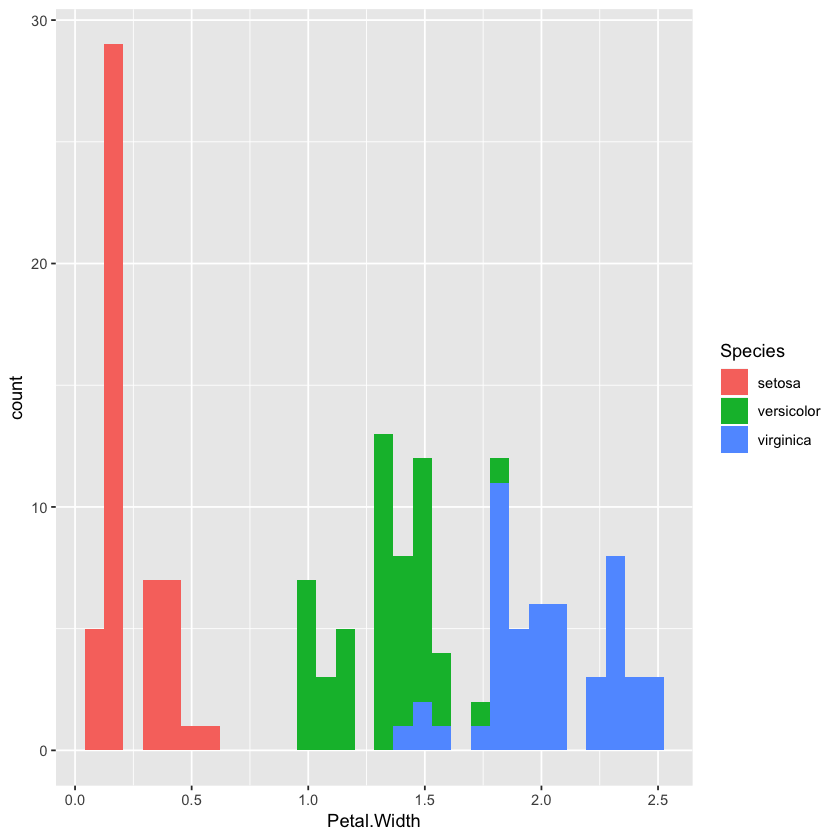

In [9]:
ggplot(iris, aes(x = Petal.Width, fill = Species)) + geom_histogram()

#### What just happened?
This command is a bit intimidating, and is part of the [`ggplot2` package](https://ggplot2.tidyverse.org/). In essence, the `ggplot` function takes a data frame (in this case `iris`) and identifies varaibles to plot (called `aesthetics`). We specified that our data comes from `Petal.Width` and that it should be color-coded using `Species`. We then use the `+` to add functions that plot the data, such as the one above that 
#### What does this mean?
Looking at the histogram you can intuitively see that the distribution of petal width is diffierent between different species. However, we're looking at only at one variable, and we'll want to 
- summarize data by applying functions to the data frame
- look at all the data at once using principal components analysis (PCA)
- performing statistical tests on the data to quantify our intuition


## the _tidyverse_ package collection for data transformation and visualization
You see that the first thing we did is load the `tidyverse` library. This is actually a collection of many tools, including `ggplot2`, which allow data manipulation and visualization. We'll now explore this package works using the iris data set. We will start by introducing the piping notation `%>%`, which moves data from one function to another. For example, an alternative way to writing the plotting fuction above is 
```r
iris %>% ggplot(aes(x = Petal.Width, fill = Species)) + geom_histogram()
```
Try it in the code cell below! The operator `%>%` tells `ggplot` that the input is the output of the previous command, which is this case is just the contents of the data frame `iris`.


In this example, it's not actually easier than the original function. Let's see why you might want to do this.

In [11]:
iris %>% 
    group_by(Species) %>% 
    summarize(Petal.Width.Mean = mean(Petal.Width), 
              Petal.Width.SD = sd(Petal.Width))

Species,Petal.Width.Mean,Petal.Width.SD
setosa,0.246,0.1053856
versicolor,1.326,0.1977527
virginica,2.026,0.2746501


This set of commands is easy to read, illustrating a simple set of steps:
1. Group the data by species
2. Compute the average (mean) and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) (amount of variability) for each species

However, the table is a bit hard to visualize in your mind, but we easily plot it by a slight modification of the code.

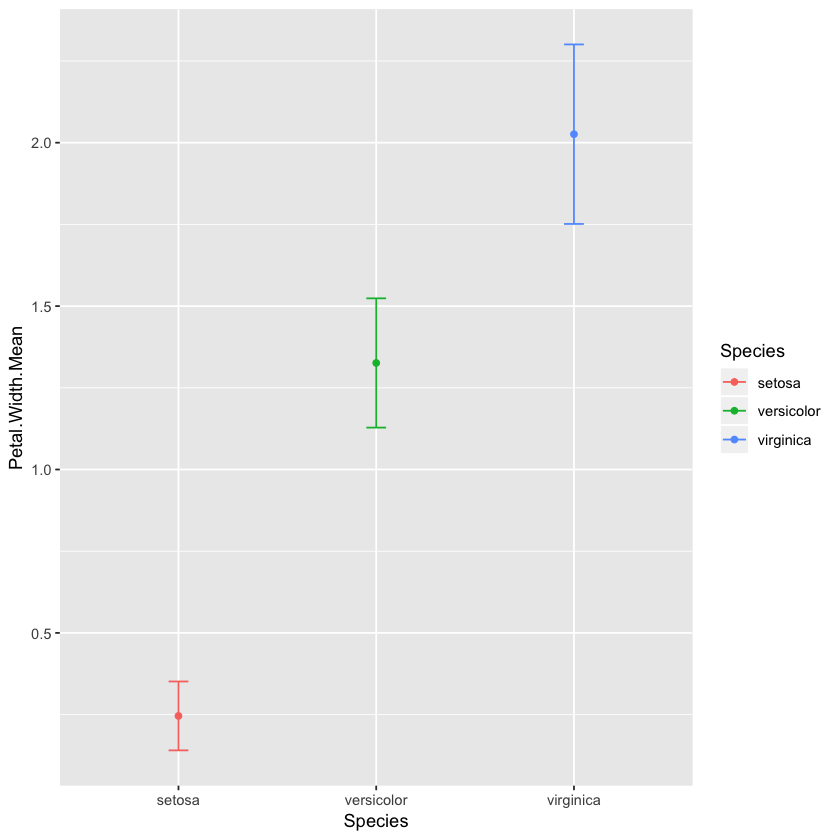

In [15]:
iris %>% 
    group_by(Species) %>%  # tell R to conduct analyses for each species
    summarize(Petal.Width.Mean = mean(Petal.Width), 
              Petal.Width.SD = sd(Petal.Width)) %>%
ggplot(aes(x = Species, y = Petal.Width.Mean, color = Species)) + 
    geom_errorbar(aes(ymin = Petal.Width.Mean - Petal.Width.SD, 
                      ymax = Petal.Width.Mean + Petal.Width.SD), width = .1) +
    geom_point()  # plot the dot representing the mean


**Side note:** You'll notice that I'm breaking up the code across lines to increase legibility. The `width` argument is likewise optional, and controls the width of the error bars, as I find the default pretty ugly. Likewise, you may find yourself tweaking the default plots to make them more appealing for you and your readers.

#### Custom functions

Intuitively, our estimate of the mean gets more accrurate the more flowers you measure. We can estimate how well we estimate the mean using a statistic called [_standard error of the mean_ (SEM)](https://en.wikipedia.org/wiki/Standard_error), which is defined as $ \sigma^-_{x} = \frac{s}{\sqrt(n)} $, where $s$ is the standard deviation and $n$ is the number of measurements. Clearly, as N gets bigger the SEM goes to zero, indicating that we have an increasingly precise estimate of the mean.

**Confusion alert:** The _standard deviation_ estimates how much variability there is in the data, _i.e._ a property of the samples population. The _standard error_ is a measure of how well we esimate a value we derive from sampling the population.

Let's say that you don't want to plot the standard deviation, but rather the standard error. Suprisingly, R doesn't have a built-in standard error function, but we can easily define one, and apply it to our data as we would a built-in function

In [18]:
se <- function(x) {
    sd(x)/sqrt(length(x))
}

This code just tells R to take a bunch of values as input, which we call `x` and then apply the above formula to them. 

In [19]:
iris %>% 
    group_by(Species) %>% 
    summarize(Petal.Width.Mean = mean(Petal.Width), 
              Petal.Width.SD = sd(Petal.Width),
              Petal.Width.SE = se(Petal.Width))  # apply custom SEM function

Species,Petal.Width.Mean,Petal.Width.SD,Petal.Width.SE
setosa,0.246,0.1053856,0.01490377
versicolor,1.326,0.1977527,0.02796645
virginica,2.026,0.2746501,0.03884138


## Principal components analysis

TODO: Explain PCA

We can easily implement and plot the results of the PCA in R. 

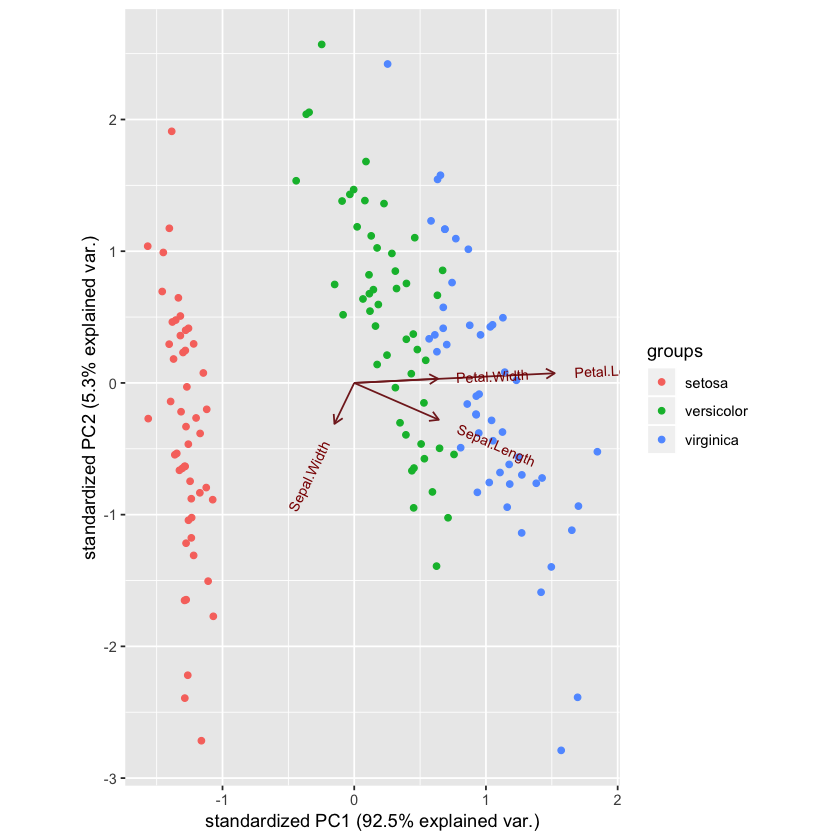

In [35]:
iris %>% 
    select(-Species) %>% # remove "Species" labels from the analysis
    prcomp() %>%         # run the PCA
    ggbiplot(groups = iris$Species)   # plot the results

A couple of notes on syntax. First, we use the `select` function to remove the species column from the analysis, since PCA expects only numeric data. However, we are actually interested in looking at the differences between species, so we add these data separately to the `ggbiplot` function using the notation `iris$Species`, which referes to the `Species` column of the `iris` data frame.

### Interpreting PCA results

We ploted the first components of the PCA, and you can tell that the first one explains most of the variance. Each point on the plot corresponds to an individual sample's _scores_ plotted onto the first two principal component axes, color-coded by species. 

The arrows indicate the _loading_ of each original variable onto the first two principal components. Essentially, this is the extent to which the original variables are correlated with the principal component axes. In other words, longer arrows mean that input variables contribute more to a given principal component.

Thus, looking a the plot, we can tell that the species strongly differ from each other in petal length and width, and to lesser extent in sepal length, and to a lesser extent yet in sepal width.

### Statistical testing using t-tests

Our visual examination of the data suggests that there are differences between groups. But how do we verify this intuition? The standard way is using statistical testing, which tells us the likelihood that we can obtain the given pattern by chance alone. We'll use a very classic statistica test (the [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test)) to compare diffrences between _versicolor_ and _virginica_. 

In [59]:
iris %>% 
    filter(Species != "setosa") %>% # it's a pariwise test, so we need to drop one of the species
    # t.test is a base R function and not designed to work with tidyverse by default,
    # so we use a dot to tell the t.test function that data are piped in
    t.test(Sepal.Length ~ Species, data = .)  


	Welch Two Sample t-test

data:  Sepal.Length by Species
t = -5.6292, df = 94.025, p-value = 1.866e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8819731 -0.4220269
sample estimates:
mean in group versicolor  mean in group virginica 
                   5.936                    6.588 


This tesll us that the the differences between groups are no likely to occur by chance (p-value = $1.8*10^{-7}$). We typically assume that a p-value < 0.05 is significant, so we conclude that these differences are _statistically significant_.

### Importing data
In this example we used a built-in data set, but often you will have to import data from another source, such as transcribed field notes from Excel. There are a number of functions that can import Excel spreadsheets, including from URLs. The `DownloadXLSX` function from the `flipAPI` library is one of them. It generates a data frame that we can use in the analysis as above.

In [63]:
irisURL <- "https://github.com/mikheyev/ecology-pracs/blob/master/data/iris.xlsx?raw=true"
iris2 <- DownloadXLSX(irisURL)
head(iris2)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


## Practical 2 exercises
Please submit this report electronically the Turnitin link on the BIOL2131/6004 Ecology Wattle page by noon, XXXXX 2019. You can answer the questions below, then use the `File:Download as:PDF via LaTeX` function in the menu to generate the report. Before you do so, make sure you use the `Kenel:Restart & Run all` option to re-run everything from scratch.

For each question run a code cell where appropriate

1. What happens when you run the `ggplot` function by itself, without any other functions appended using `+`? Why do you get the output that you do?

2. Plot the standard error for the iris data set

3. Using the [formula for sample standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) $(s = \sqrt{\frac{\sum^N_{i=i} (x_i - \bar x)^2}{N-1}})$ to create a custom function called `sd2`. Prove that it gives the same result as the built-in `sd` function.

4. Make a scatterplot of Petal.Width _vs._ Sepal.Width, and color-code the points by species. Hint: we've already used the `ggplot2` function necessary to accomplish this.

5. Create a table with the number of flowers that have `Sepal.Width` greater than 3 in each species.